<a href="https://colab.research.google.com/github/020/020.github.io/blob/master/emergency_arrivals_hour_ts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install pycaret-ts-alpha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
import pandas as pd
data = pd.read_csv('/content/arrivals_hour.csv')
data['date'] = pd.to_datetime(data['date'])
#data.set_index('date').plot()
data.set_index('date', inplace=True, drop=True)
data = data.asfreq('H')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2019-01-01 00:00:00 to 2019-12-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   arrivals  8760 non-null   int64
dtypes: int64(1)
memory usage: 136.9 KB


In [50]:
data['arrivals'].isnull().values.any()

False

In [46]:
data.shape

(8256, 1)

In [51]:
data.head()

,arrivals
date,
2019-01-01 00:00:00,58
2019-01-01 01:00:00,66
2019-01-01 02:00:00,61
2019-01-01 03:00:00,68
2019-01-01 04:00:00,54


In [52]:
from pycaret.time_series import *
#fh = forecast horizon
setup(data, fh = 250, fold = 5, session_id = 123)

,Description,Value
0,session_id,123
1,Target,arrivals
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(8760, 1)"
5,Train data shape,"(8510, 1)"
6,Test data shape,"(250, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,5
9,Enforce Prediction Interval,False


In [53]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Actual,Length,,8760.0
1,Summary,Statistics,Actual,Mean,,92.807991
2,Summary,Statistics,Actual,Median,,104.0
3,Summary,Statistics,Actual,Standard Deviation,,41.842114
4,Summary,Statistics,Actual,Variance,,1750.762535
5,Summary,Statistics,Actual,Kurtosis,,-1.359989
6,Summary,Statistics,Actual,Skewness,,-0.178574
7,Summary,Statistics,Actual,# Distinct Values,,173.0
8,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 24}",72003.95297
9,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 48}",142698.460853


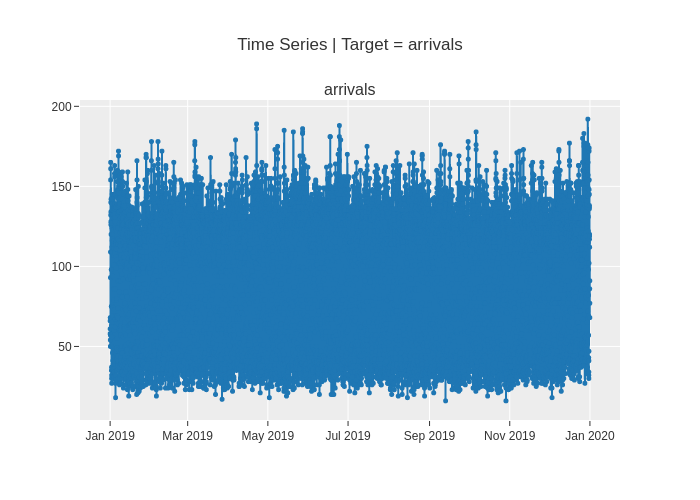

In [54]:
plot_model(plot = 'ts')

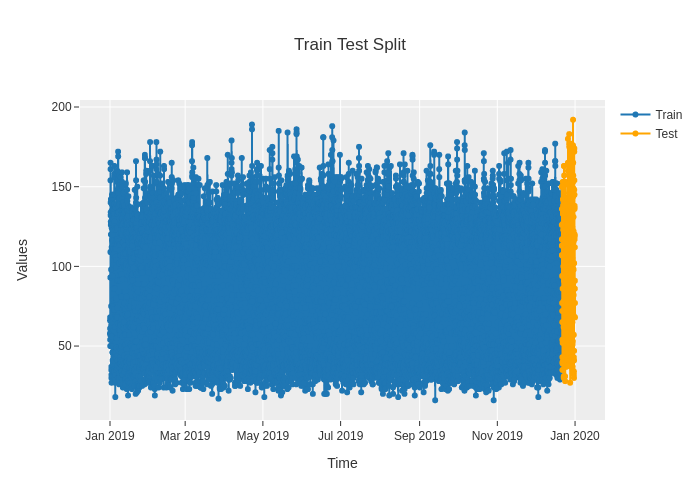

In [55]:
plot_model(plot = 'train_test_split')

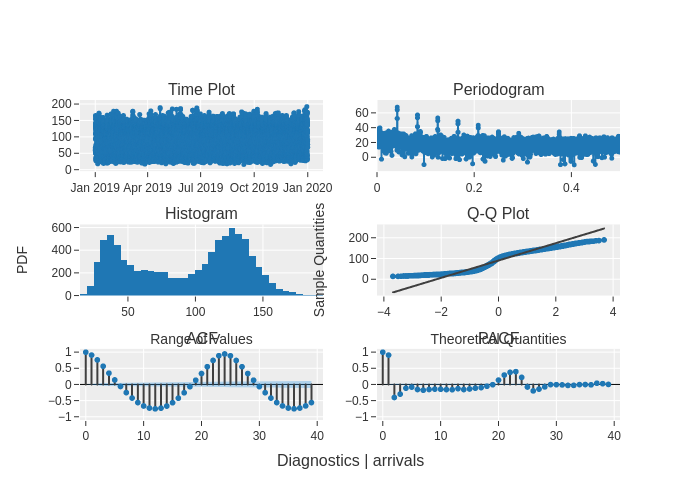

In [56]:
plot_model(plot = 'diagnostics')

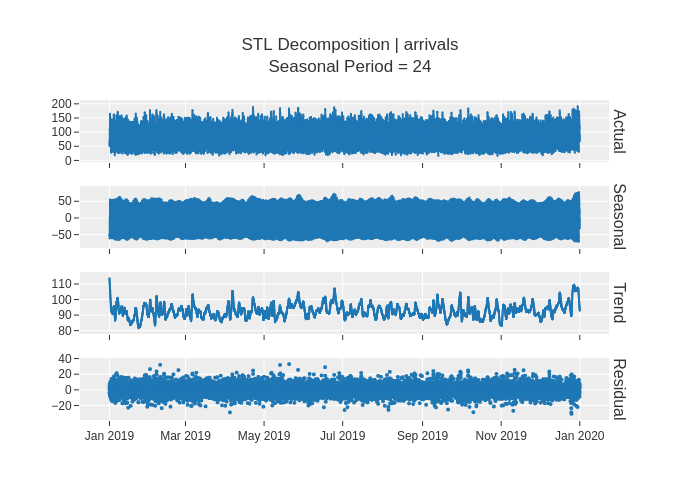

In [57]:
plot_model(plot = 'decomp_stl')

In [58]:
best = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,7.9102,10.0511,0.0962,0.096,0.769,0.7473,0.9385,1.332
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,7.9102,10.0511,0.0962,0.096,0.769,0.7473,0.9385,1.330
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,7.9102,10.0511,0.0962,0.096,0.769,0.7473,0.9385,1.332
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,7.9131,10.0552,0.0962,0.0961,0.7693,0.7476,0.9384,1.356
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,7.9155,10.0587,0.0963,0.0961,0.7695,0.7479,0.9384,1.330
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,7.9106,10.0517,0.0962,0.0961,0.7691,0.7474,0.9385,1.370
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,7.933,10.0847,0.0964,0.0963,0.7712,0.7498,0.9381,1.308
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,7.9554,10.106,0.0966,0.0965,0.7734,0.7514,0.9379,1.322
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,7.937,10.0931,0.0962,0.0969,0.7716,0.7504,0.9379,1.348
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,7.9628,10.1128,0.0967,0.0975,0.7741,0.7519,0.9377,6.912


In [59]:
lr_cds_dt = create_model('lr_cds_dt')
print('lr_cds_dt')

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2019-10-30 11:00,8.2755,10.3254,0.1035,0.0991,0.8056,0.7692,0.9379
1,2019-11-09 21:00,8.3561,10.7954,0.0990,0.1010,0.8119,0.8025,0.9323
2,2019-11-20 07:00,7.5289,9.6396,0.0896,0.0900,0.7305,0.7147,0.9396
3,2019-11-30 17:00,7.4799,9.7140,0.0940,0.0911,0.7272,0.7220,0.9443
4,2019-12-11 03:00,7.9105,9.7811,0.0948,0.0991,0.7698,0.7282,0.9384
Mean,NaT,7.9102,10.0511,0.0962,0.0960,0.7690,0.7473,0.9385
SD,NaT,0.3641,0.4439,0.0047,0.0046,0.0358,0.0335,0.0038


lr_cds_dt


In [60]:
tuned_lr_cds_dt = tune_model(lr_cds_dt)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2019-10-30 11:00,8.2617,10.3380,0.1032,0.0987,0.8043,0.7701,0.9378
1,2019-11-09 21:00,8.3722,10.8001,0.0997,0.1015,0.8135,0.8029,0.9322
2,2019-11-20 07:00,7.5228,9.6381,0.0896,0.0900,0.7299,0.7145,0.9396
3,2019-11-30 17:00,7.5052,9.7256,0.0940,0.0912,0.7297,0.7229,0.9442
4,2019-12-11 03:00,7.9186,9.7788,0.0947,0.0991,0.7706,0.7280,0.9384
Mean,NaT,7.9161,10.0561,0.0962,0.0961,0.7696,0.7477,0.9384
SD,NaT,0.3608,0.4458,0.0047,0.0046,0.0355,0.0336,0.0038


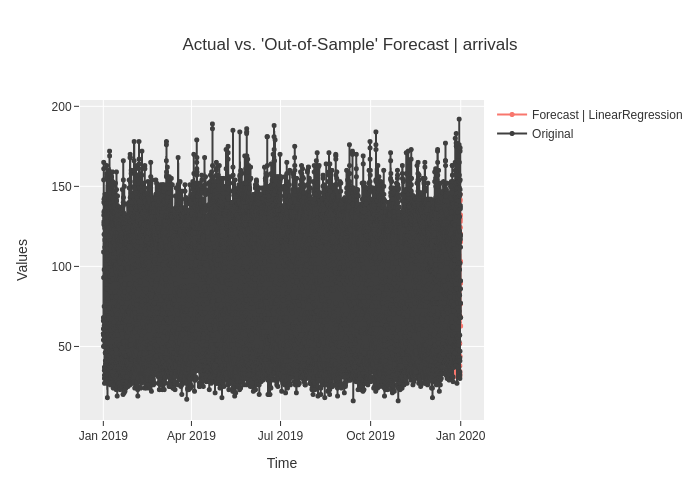

In [61]:
plot_model(lr_cds_dt, plot = 'forecast')

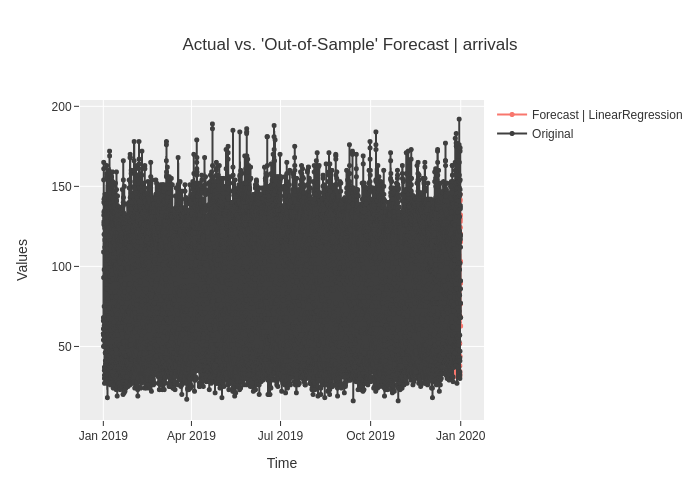

In [62]:
plot_model(best, plot = 'forecast')

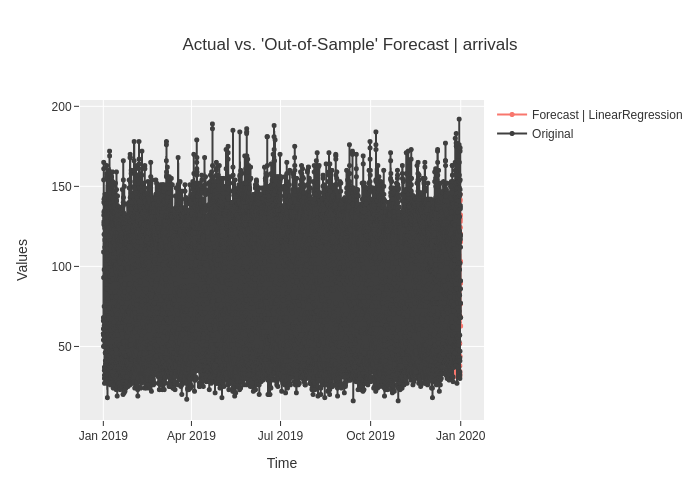

In [63]:
#fh = forecast horizon
plot_model(best, plot= 'forecast', data_kwargs = {'fh' : 250})

In [73]:
final_best = finalize_model(best)
predict_model(final_best, fh = 500)

,y_pred
2020-01-01 00:00,51.2777
2020-01-01 01:00,43.3988
2020-01-01 02:00,37.4875
2020-01-01 03:00,33.7922
2020-01-01 04:00,32.0921
...,...
2020-01-21 15:00,130.7369
2020-01-21 16:00,128.9219
2020-01-21 17:00,125.2977
2020-01-21 18:00,121.3622


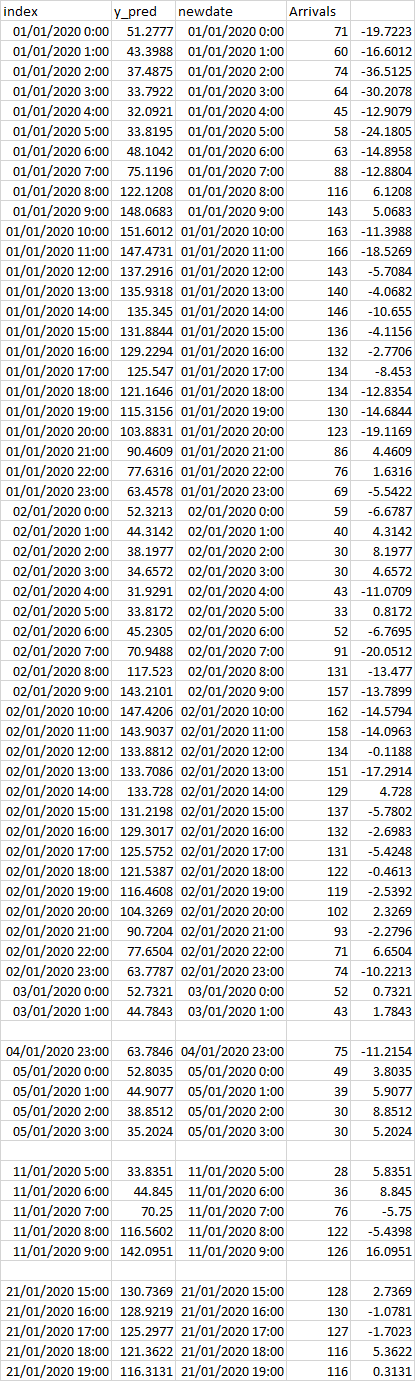